In [19]:
#Q1:
# Importing pandas library
import pandas as pd

# Load the dataset
df = pd.read_csv('C:\\Users\\PMLS\\Documents\\zoya\\zoya\\ML internship\\ML internship Task 3\\Queries.csv')

# Check for null values
null_values = df.isnull().sum()
print("Null Values:\n", null_values)

# Get column information
column_info = df.info()
print("\nColumn Information:\n", column_info)

# Descriptive statistics
statistics = df.describe()
print("\nDescriptive Statistics:\n", statistics)


Null Values:
 Top queries    0
Clicks         0
Impressions    0
CTR            0
Position       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Top queries  1000 non-null   object 
 1   Clicks       1000 non-null   int64  
 2   Impressions  1000 non-null   int64  
 3   CTR          1000 non-null   object 
 4   Position     1000 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB

Column Information:
 None

Descriptive Statistics:
           Clicks   Impressions     Position
count  1000.0000   1000.000000  1000.000000
mean    172.2750   1939.466000     3.985930
std     281.0221   4856.702605     2.841842
min      48.0000     62.000000     1.000000
25%      64.0000    311.000000     2.010000
50%      94.0000    590.500000     3.120000
75%     169.0000   1582.750000     5.342500
max    5223.0000  733

In [20]:
#Q:2
# Check the current data type of the 'CTR' column
print("Current Data Type of 'CTR' column:", df['CTR'].dtype)

# Convert 'CTR' column from percentage string to float
df['CTR'] = df['CTR'].str.rstrip('%').astype('float') / 100.0

# Check the updated data type of the 'CTR' column
print("Updated Data Type of 'CTR' column:", df['CTR'].dtype)


Current Data Type of 'CTR' column: object
Updated Data Type of 'CTR' column: float64


In [21]:
#Q:3
import pandas as pd
from collections import Counter
import re
import plotly.express as px
import plotly.io as pio

# Function to clean and split queries into words
def clean_and_split(query):
    # Convert to lowercase
    query = query.lower()
    # Remove special characters and digits
    query = re.sub(r'[^a-z\s]', '', query)
    # Split into words
    words = query.split()
    return words

# Apply the function to each query in the 'Top Queries' column
df['Cleaned Queries'] = df['Top queries'].apply(clean_and_split)

# Flatten the list of words from all queries
all_words = [word for sublist in df['Cleaned Queries'] for word in sublist]

# Count the frequency of each word
word_counts = Counter(all_words)

# Create a DataFrame for word frequencies
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the word frequencies
fig_word_freq = px.bar(word_freq_df.head(20), x='Word', y='Frequency', labels={'x':'Word', 'y':'Frequency'})
fig_word_freq.update_layout(title='Top 20 Common Words in Search Queries')
fig_word_freq.show()


In [22]:
#Q:4
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Sort the DataFrame by clicks and impressions in descending order
top_queries_by_clicks = df.sort_values(by='Clicks', ascending=False).head(10)
top_queries_by_impressions = df.sort_values(by='Impressions', ascending=False).head(10)

# Plot top queries by clicks
fig_clicks = px.bar(top_queries_by_clicks, x='Top queries', y='Clicks', labels={'x':'Top queries', 'y':'Clicks'})
fig_clicks.update_layout(title='Top queries by Clicks')
fig_clicks.show()

# Plot top queries by impressions
fig_impressions = px.bar(top_queries_by_impressions, x='Top queries', y='Impressions', labels={'x':'Top queries', 'y':'Impressions'})
fig_impressions.update_layout(title='Top queries by Impressions')
fig_impressions.show()


In [23]:
#Q:5
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Sort the DataFrame by CTR in descending order to get highest CTRs
highest_ctr_queries = df.sort_values(by='CTR', ascending=False).head(10)

# Sort the DataFrame by CTR in ascending order to get lowest CTRs
lowest_ctr_queries = df.sort_values(by='CTR', ascending=True).head(10)

# Plot queries with highest CTRs
fig_highest_ctr = px.bar(highest_ctr_queries, x='Top queries', y='CTR', labels={'x':'Top queries', 'y':'CTR'})
fig_highest_ctr.update_layout(title='Queries with Highest CTRs')
fig_highest_ctr.show()

# Plot queries with lowest CTRs
fig_lowest_ctr = px.bar(lowest_ctr_queries, x='Top queries', y='CTR', labels={'x':'Top queries', 'y':'CTR'})
fig_lowest_ctr.update_layout(title='Queries with Lowest CTRs')
fig_lowest_ctr.show()


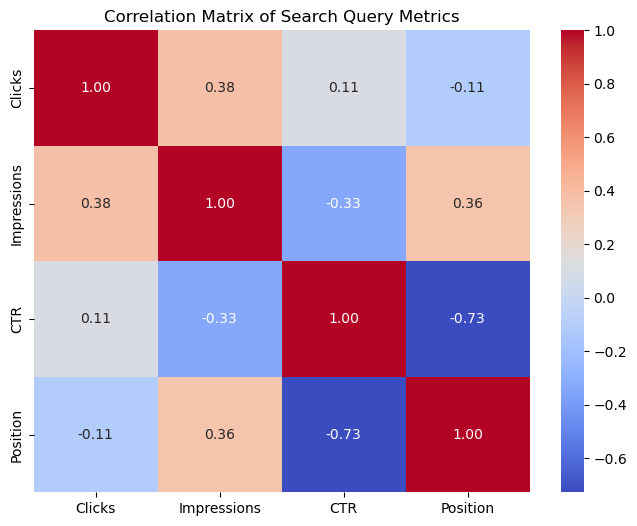

In [24]:
#Q:6
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Exclude non-numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_columns]

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Search Query Metrics')
plt.show()


In [25]:
#Q:7
import pandas as pd
from sklearn.ensemble import IsolationForest

# Extract relevant numerical columns for anomaly detection
numeric_columns = ['Clicks', 'Impressions', 'CTR', 'Position']
df_numeric = df[numeric_columns]

# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.5, random_state=10)

# Fit the model on the numeric data
isolation_forest.fit(df_numeric)

# Predict outliers/anomalies (1 for inliers, -1 for outliers)
df['Anomaly'] = isolation_forest.predict(df_numeric)

# Print rows flagged as anomalies
anomalies = df[df['Anomaly'] == -1]
print("Anomalies Detected:")
print(anomalies[['Top queries', 'Clicks', 'Impressions', 'CTR', 'Position']])


Anomalies Detected:
                                           Top queries  Clicks  Impressions  \
0                          number guessing game python    5223        14578   
1                                  thecleverprogrammer    2809         3456   
2                     python projects with source code    2077        73380   
3            classification report in machine learning    2012         4959   
4                                the clever programmer    1931         2528   
..                                                 ...     ...          ...   
989                      python emotion detection text      49          176   
991  machine learning classification algorithms com...      49          104   
992                      r squared in machine learning      48         1890   
995             human activity recognition python code      48          369   
998             credit scoring machine learning python      48          243   

        CTR  Position  
0    0.